# Introduction
The purpose of this practical session is to implement a first machine learning model on a regression problem using RidgeRegression and `sklearn`. The dataset we will used is the california housing dataset since well known boston house dataset as ethical issues.

This dataset consists in a description of houses by 8 features, each house being associated to a measure of its price. The goal here is to predict the price of an house given its description.
## The dataset
 1. Import the dataset from sklearn and check the documentation.


In [28]:
from sklearn.datasets import fetch_california_housing
help(fetch_california_housing)

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : bool, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool, default=

2. Now, we want to import the dataset into two variables, namely `X` and `y`. `X` will contains the description of data, `y` the outputs associated to each data. Check the dimensions of the two variables

In [29]:
#load data
X,y = fetch_california_housing(return_X_y=True)

# using shape function, we can look dimensions
print(X.shape, y.shape)

(20640, 8) (20640,)


## Data analysis

Now we will explore our dataset. 

1. First, plot an histogram of `y` values to check its distribution.You can have a look at `hist` function of matplotlib.pyplot module   

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

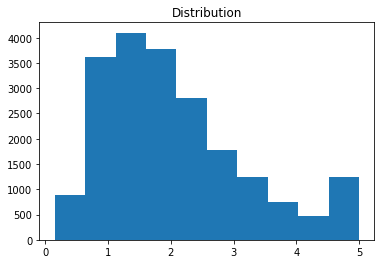

In [30]:
import matplotlib.pyplot as plt
plt.title("Distribution")
plt.hist(y)

2. Second, we will check the 13 features included in `X`. Compute mean and standard deviation independantly for each feature.


In [31]:
import numpy as np

# this dataset has 8 features, not 13 (mentioned wrong in the description of 2nd task above)

print("Mean of each feature: ", np.mean(X, axis=0))
print("Standard deviation of each future: ", np.std(X, axis=0))

Mean of each feature:  [ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]
Standard deviation of each future:  [1.89977569e+00 1.25852527e+01 2.47411320e+00 4.73899376e-01
 1.13243469e+03 1.03857980e+01 2.13590065e+00 2.00348319e+00]


3. Check this information globally using the `boxplot` function from matplotlib.pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8aa0ce8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8aa0cf76d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8aa0ce8c70>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8aa0cf7d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8aa0d040d0>,
 'means': []}

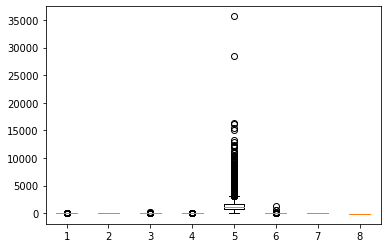

In [32]:
plt.boxplot(X)

4. What do you conclude from this first step ?

Here in the plot, we can see that the range of values which came from dataset are not the same. That's why to get better result, we can normalize them.

# Machine Learning
## Protocol

Before starting to learn a model, we have to use a clear and as much as possible unbiased protocol to evaluate our model. This protocol starts by splitting the data into two sets. The first one will be used to learn the parameters of our model, the second one will be used to evaluate the performance of our learning step.

1. Split the data into two subsets using the `train_test_split` method from `sklearn.model_selection` module. Use the split ratio of your choice.

In [33]:
#Split data
from sklearn.model_selection import train_test_split

print(X.shape)
# I split dataset, like 80% to train and 20% to test by defining test_size to 0.2
# as you can see, 20640 x 0.2 = 4128
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_test.shape)

(20640, 8)
(16512, 8) (4128, 8)


## Normalization
2. Now we should normalize the data according to the observation made in the first section. Take care of not using the test set to compute the parameters required to normalize the data. Compute `X_train_norm` and `X_test_norm` correspondong normalized data `X_train` and `X_test` respectively.

In [34]:
#Scale data
#Mean and std must be evaluated on train to avoid bias

train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_norm = (X_train - train_mean)/train_std

#apply scale to X_test


X_test_norm = (X_test - train_mean)/train_std

3. Another way to do is to use the `StandardScaler` class from `sklearn.preprocessing` module.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## A first model
Now our data is normalized we can try to learn our first model in a naive approach. We will use the `Ridge` class from `sklearn.linear_model` which implements the Ridge Regression scheme seen during our lessons.
1. Learn a first model using `Ridge` class and `X_train_norm`.
2. What is the default $\lambda$ defined by the `Ridge` class ?

In [36]:
#First Ridge witout scaling and cv
from sklearn.linear_model import Ridge

regressor = Ridge()

# let us see our hyperparameter
print(regressor.alpha)

1.0


3. Train your model on `X_train_norm` and predict the same data. Compute the mean absolute error (MAE)

In [37]:
from sklearn.metrics import mean_absolute_error

regressor.fit(X_train_norm, y_train)
y_train_pred = regressor.predict(X_train_norm)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_train

0.5273558766457428

4. Now predict on `X_test_norm` and measure the MAE. What do you observe ?

In [38]:
y_test_pred = regressor.predict(X_test_norm)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_test

0.5363726806237593

## Model parameters
Both fit to data and regularization terms have an effect on our model parameters $\mathbf{w}$.
1. Print and plot the coefficients $\mathbf{w}$. There are available from your instance of `Ridge` class.

In [39]:
regressor.coef_

array([ 0.84656539,  0.1227611 , -0.30443199,  0.34943985,  0.0026617 ,
       -0.03802033, -0.90580591, -0.87708174])

2. Change the $\lambda$ value of your parameter to 1000. Retrain your model, recompute the prediction error. What do you observe ? 

Be careful, in `sklearn` $\lambda$ parameter is denoted as $\alpha$

In [40]:
regressor = Ridge(alpha=1000)

regressor.fit(X_train_norm, y_train)

y_train_pred = regressor.predict(X_train_norm)
y_test_pred = regressor.predict(X_test_norm)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("MAE for train: ", mae_train)
print("MAE for test: ", mae_test)

# Values of MAE train and test, both were increased
# I suppose if we will increase value of lambda, then our result will be increased too

MAE for train:  0.5458891339115564
MAE for test:  0.5447028334598004


3. Now check your model parameters and compared them to your model when $\lambda = 1$. What do you conclude ?

In [41]:
regressor.coef_
# I suppose if we will increase value of lambda, then our result will be increased too

array([ 0.77552772,  0.15524126, -0.149757  ,  0.17395208,  0.01349203,
       -0.03907893, -0.51319973, -0.47655429])

## Finding the best $\lambda$
Since $\lambda$ may have a strong effect on your model performance, we need to find the best possible value according to the dataset we work on. 
1. Try different values for $\lambda$ and evaluate the performances. Use a log scale of values between $10^{-3}$ to $10^{4}$ , i.e. `alphas = np.logspace(-3,4,10)`.

In [42]:
mae_train = []
mae_test = []
coefs = []
alphas = np.logspace(-3,4,10)
for alpha in alphas:
  regressor = Ridge(alpha=alpha)
  regressor.fit(X_train_norm, y_train)
  y_train_pred = regressor.predict(X_train_norm)
  y_test_pred = regressor.predict(X_test_norm)
  mae_train.append(mean_absolute_error(y_train, y_train_pred))
  mae_test.append(mean_absolute_error(y_test, y_test_pred))
  coefs.append(regressor.coef_)


print(mae_train, mae_test, coefs)

[0.5273599204462824, 0.5273599001846081, 0.5273597787281998, 0.5273590509444727, 0.5273547126784497, 0.5273318099906835, 0.5273153096207016, 0.5298116166232462, 0.5603989603047828, 0.6563958455700659] [0.5363910254870766, 0.5363909336737075, 0.5363903832864118, 0.5363870844980461, 0.5363673337901248, 0.5362535599283242, 0.5356664985004098, 0.5350372568493523, 0.5567830380177593, 0.6513809963238197] [array([ 0.84661914,  0.12268317, -0.30462992,  0.34968897,  0.00263574,
       -0.03801708, -0.90657925, -0.87786476]), array([ 0.84661887,  0.12268356, -0.30462893,  0.34968772,  0.00263587,
       -0.0380171 , -0.90657538, -0.87786084]), array([ 0.84661726,  0.1226859 , -0.30462299,  0.34968026,  0.00263665,
       -0.03801719, -0.90655217, -0.87783735]), array([ 0.84660761,  0.12269992, -0.30458743,  0.34963549,  0.00264132,
       -0.03801778, -0.90641311, -0.87769655]), array([ 0.84654967,  0.12278381, -0.30437422,  0.34936717,  0.00266926,
       -0.03802127, -0.90558052, -0.87685352]

 2. What is the best value for $\lambda$ ? 

10000, last one as it increases the value

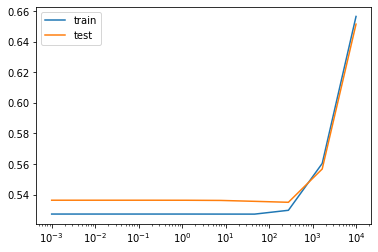

In [43]:

plt.plot(alphas, mae_train, label='train')
plt.plot(alphas, mae_test, label='test')
plt.xscale("log")
plt.legend()

3. Plot the different values of $\mathbf{w}$ parameters for each $\lambda$ values. Discuss.


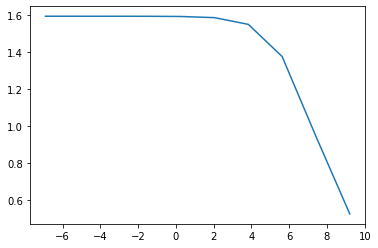

In [44]:
plt.plot(np.log(alphas), [np.linalg.norm(c) for c in coefs])

### Cross validation
To find the best $\lambda$ value, we should use only the train set. To evaluate the performance on unseen data without using test set, we will simulate it by splitting the train set into a new train set and a validation set used to evaluate the performance according to $\lambda$. A good practice is to repeat this split to have a better estimation of the performance. 

`sklearn` provide a class `GridSearchCV` in `sklearn.model_selection` which implements this protocol.
1. Check the documentation of `GridSearchCV`

In [45]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

2. Define the parameters you want to test during your cross validation.

In [46]:
parameters = {"alpha" : np.logspace(-3,3,10)}
parameters

{'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
        4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
        2.15443469e+02, 1.00000000e+03])}

3. Run your grid search cross validation and print the MAE for test and train set. What is the  best value of $\lambda$ according to your Cross Validation ?

In [47]:
ridge = Ridge()
cv = GridSearchCV(ridge, parameters, scoring='neg_mean_absolute_error')
cv.fit(X_train_norm, y_train)

print("Best alpha", cv.best_params_)

y_test_pred = cv.best_estimator_.predict(X_test_norm)
print("Mean: ", mean_absolute_error(y_test, y_test_pred))

Best alpha {'alpha': 10.0}
Mean:  0.5362150224681151


4. What is the criterion used by `GridSearchCV` to determine the best $\lambda$ ? Change it to fit our measure of performance, i.e. the MAE.

In [48]:
cv.cv_results_

{'mean_fit_time': array([0.00561719, 0.00337439, 0.00326142, 0.00323644, 0.00329113,
        0.00590162, 0.00347462, 0.00614343, 0.00468855, 0.00334396]),
 'std_fit_time': array([2.73255867e-03, 8.55513371e-05, 4.27520081e-05, 3.72899463e-05,
        6.94182214e-05, 2.49288225e-03, 4.79996704e-05, 5.06588271e-03,
        2.60531361e-03, 1.26734903e-04]),
 'mean_score_time': array([0.00061493, 0.00059242, 0.00055237, 0.00054874, 0.00055814,
        0.00096521, 0.00057535, 0.00074086, 0.00062485, 0.00055475]),
 'std_score_time': array([6.46919544e-05, 6.28484037e-05, 3.14178881e-05, 9.97900671e-06,
        2.53697982e-05, 5.07399003e-04, 1.38310726e-05, 2.14854940e-04,
        8.37585066e-05, 2.64957604e-05]),
 'param_alpha': masked_array(data=[0.001, 0.004641588833612777, 0.021544346900318832, 0.1,
                    0.46415888336127775, 2.154434690031882, 10.0,
                    46.41588833612773, 215.44346900318823, 1000.0],
              mask=[False, False, False, False, False, Fa

## A full model design
Despite the choice of $\lambda$ is made without bias, the performance has been evaluated on only one split of the data. This particular split may be subject to exceptions and may not constitute a good estimation of the predictive ability of your model. The solution here is to repeat splits so as we average the performances of our model over different train and test sets.

1. Check the documentation of `ShuffleSplit` class in `sklearn.model_selection`

In [49]:
from sklearn.model_selection import ShuffleSplit
help(ShuffleSplit)

Help on class ShuffleSplit in module sklearn.model_selection._split:

class ShuffleSplit(BaseShuffleSplit)
 |  ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
 |  
 |  Random permutation cross-validator
 |  
 |  Yields indices to split data into training and test sets.
 |  
 |  Note: contrary to other cross-validation strategies, random splits
 |  do not guarantee that all folds will be different, although this is
 |  still very likely for sizeable datasets.
 |  
 |  Read more in the :ref:`User Guide <ShuffleSplit>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=10
 |      Number of re-shuffling & splitting iterations.
 |  
 |  test_size : float or int, default=None
 |      If float, should be between 0.0 and 1.0 and represent the proportion
 |      of the dataset to include in the test split. If int, represents the
 |      absolute number of test samples. If None, the value is set to the
 |      complement of the train size. If ``train

2. Estimate the performance of your model with 10 shuffle splits on your data. Take care to correctly normalize your data. Your code here must do everything since the beginning, ie. loading the data, splitting, cv, prediction, etc... 

In [50]:
X,y = fetch_california_housing(return_X_y=True)

splits = ShuffleSplit(n_splits=10, test_size=.2)
scaler = StandardScaler()
ridge = Ridge()
parameters = {'alpha' : np.logspace(-3,3,10)}
cv = GridSearchCV(ridge, parameters, scoring='neg_mean_absolute_error')

performances = []

for train_index, test_index in splits.split(X_train):
  X_train = X[train_index,:]
  y_train = y[train_index]

  X_test = X[test_index,:]
  y_test = y[test_index]

  scaler.fit(X_train)
  X_train_norm = scaler.transform(X_train)
  X_test_norm = scaler.transform(X_test)

  cv.fit(X_train_norm, y_train)
  performances.append(np.mean(np.abs(cv.predict(X_test_norm)-y_test)))

print(f"Final performance on test set: MAE = {np.mean(performances)} Standard deviation: {np.std(performances)}")

Final performance on test set: MAE = 0.5329416451561406 Standard deviation: 0.008682330679343344


# Lasso Regression
An alternative to Ridge Regression is the Lasso Regression ([check here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)). Lasso Regression redefines the penalization term to the L1-norm of $\mathbf{w}$. This penalization ensures a sparsity constraint on the coefficients of $\mathbf{w}$. 

1. Learn your model using a Lasso Regression, available with the class `Lasso` of module `sklearn.linear_model`.

In [51]:
from sklearn.linear_model import Lasso

regressor = Lasso(alpha=0.01)
regressor.fit(X_train_norm, y_train)

print(np.mean(np.abs(regressor.predict(X_test_norm)-y_test)))

0.5358627067147155


2. Check the regularization path, i.e. the evolution of $\mathbf{w}$ as $\lambda$ increases. Do you see the sparsity ?


Text(0, 0.5, 'Value of each coefficient w')

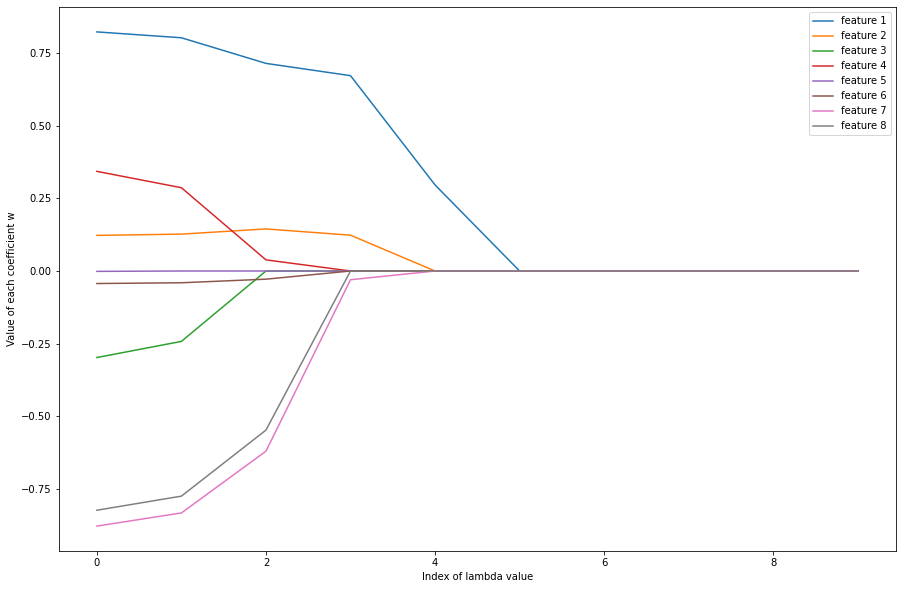

In [52]:
alphas = np.logspace(-3,3,10)
coefs = np.zeros((10,8))

for i, alpha in enumerate(alphas):
  regressor = Lasso(alpha=alpha)
  regressor.fit(X_train_norm, y_train)
  coefs[i,:] = regressor.coef_


plt.subplots(figsize=(15,10))
for i in range(8):
  plt.plot(coefs[:,i], label=f"feature {i+1}")
plt.legend()
plt.xlabel("Index of lambda value")
plt.ylabel("Value of each coefficient w")

3. Build and tune completly your Lasso model and compare its final performance with Ridge Regression

0.5330827705207912


Text(0, 0.5, 'Value of each coefficient w')

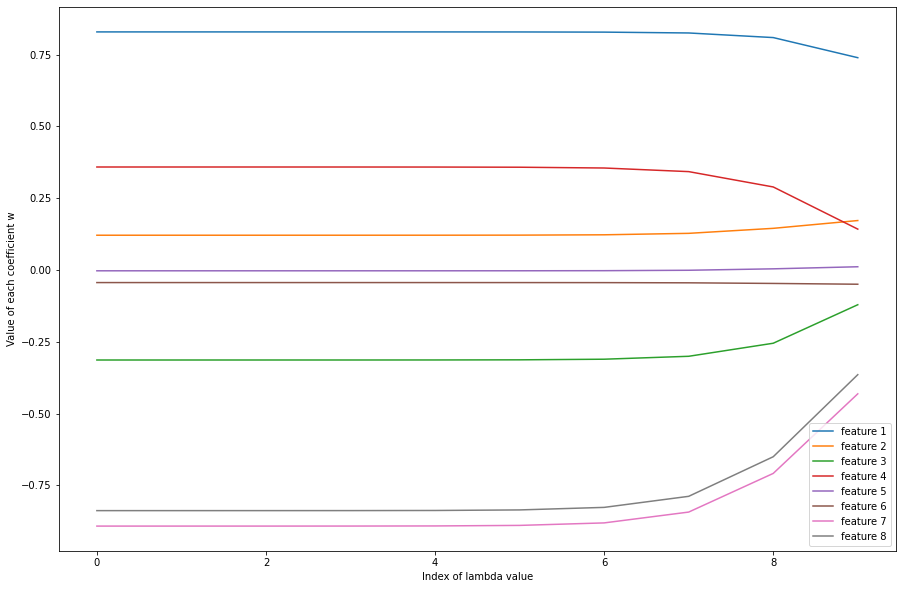

In [53]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=0.01)
regressor.fit(X_train_norm, y_train)

print(np.mean(np.abs(regressor.predict(X_test_norm)-y_test)))

alphas = np.logspace(-3,3,10)
coefs = np.zeros((10,8))

for i, alpha in enumerate(alphas):
  regressor = Ridge(alpha=alpha)
  regressor.fit(X_train_norm, y_train)
  coefs[i,:] = regressor.coef_


plt.subplots(figsize=(15,10))
for i in range(8):
  plt.plot(coefs[:,i], label=f"feature {i+1}")
plt.legend()
plt.xlabel("Index of lambda value")
plt.ylabel("Value of each coefficient w")

# Bonus section

If you succeed to previous parts, here's some suggestions to continue and go deeper in your work:

 1. Use your implementation of Ridge Regression. Compare the computationnal times.
 
 2. Implement your own Cross Validation strategy. `sklearn` provides beautiful tools but it may be interesting to implement yourself this protocol to understand it deeply.
 
 3. Make the derivation and implement your own Lasso Regression. 
 
 4. Implement and evaluate your model on a diabetes dataset `sklearn.datasets.load_diabetes`. Take care, some columns correspond to qualitative features. [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)
 

In [55]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_norm = (X_train - train_mean)/train_std
X_test_norm = (X_test - train_mean)/train_std

In [56]:
regressor = Ridge()

regressor.fit(X_train_norm, y_train)
y_train_pred = regressor.predict(X_train_norm)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_train

43.20195238380604

In [57]:
y_test_pred = regressor.predict(X_test_norm)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_test

44.37222135656193

In [58]:
parameters = {"alpha" : np.logspace(-3,3,10)}

ridge = Ridge()
cv = GridSearchCV(ridge, parameters, scoring='neg_mean_absolute_error')
cv.fit(X_train_norm, y_train)

print("Best alpha", cv.best_params_)

y_test_pred = cv.best_estimator_.predict(X_test_norm)
print("Mean: ", mean_absolute_error(y_test, y_test_pred))

Best alpha {'alpha': 10.0}
Mean:  44.23329028240641


In [65]:
lasso = Lasso()

lasso.fit(X_train_norm,y_train)
print(mean_absolute_error(y_train, lasso.predict(X_train)))
print(mean_absolute_error(y_test, lasso.predict(X_test)))

64.17072244502452
64.10418211037269
